In [1]:
# -*- coding:utf-8 -*-
# 词云展示
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize

# 去掉停用词
def remove_stop_words(f):
	stop_words = ['Movie']
	for stop_word in stop_words:
		f = f.replace(stop_word, '')
	return f

In [2]:
# 生成词云
def create_word_cloud(f):
	print('根据词频，开始生成词云!')
	f = remove_stop_words(f)
	cut_text = word_tokenize(f)
	#print(cut_text)
	cut_text = " ".join(cut_text)
	wc = WordCloud(
		max_words=100,
		width=2000,
		height=1200,
    )
	wordcloud = wc.generate(cut_text)
	# 写词云图片
	wordcloud.to_file("wordcloud.jpg")
	# 显示词云文件
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.show()

In [3]:
# 数据加载
data = pd.read_csv('C:/Users/Dracula/Desktop/1/L2/homework_MarketBasket/Market_Basket_Optimisation.csv')
#将数据放进Transaction中
transcations = []
#存储key:value
item_count={}
for i in range(0,data.shape[0]):
        #print(i)   #在自己本地的环境运行实在是慢，如果不是打印出来我以为卡死了
        temp = []
        for j in range(0,data.shape[1]):
            item = str(data.values[i,j])
            if item != 'nan':
                temp.append(item)
                if item not in item_count:
                    item_count[item] =1
                else:
                    item_count[item]+=1	
        transcations.append(temp)

根据词频，开始生成词云!


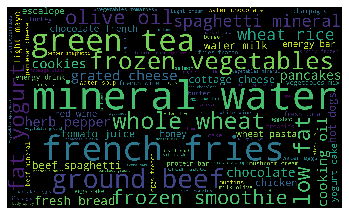

In [4]:
all_word = ' '.join('%s' %item for item in transcations)

create_word_cloud(all_word)

In [11]:
sort_all = sorted(item_count.items(),key=lambda x: x[1],reverse=True)
top10 = sort_all[:10]

In [12]:
print(top10)

[('mineral water', 1787), ('eggs', 1348), ('spaghetti', 1306), ('french fries', 1282), ('chocolate', 1230), ('green tea', 990), ('milk', 972), ('ground beef', 737), ('frozen vegetables', 715), ('pancakes', 713)]
